# Fancy plots

In [1]:
# Restore file
import pandas as pd

filename = 'coma_lines.hdf'
coma_df = pd.read_hdf(filename)

In [2]:
coma_df

,ra,dec,z,distance,h_beta_flux,h_beta_flux_err,h_alpha_flux,h_alpha_flux_err,oiii_5007_flux,nii_6584_flux,Type
0,188.54656,35.612766,0.021488,562.173471,21.08341,2.826998,73.75804,3.580931,83.83190,43.469760,SY
1,188.69674,35.781110,0.021702,565.918724,37.92557,2.400332,137.97110,2.760354,53.81482,24.242930,SF
2,185.38950,30.016099,0.023215,516.330726,40.44841,2.088908,119.65410,2.146284,39.07370,20.647430,SF
3,184.49480,29.085528,0.025326,555.056940,18.48220,2.269524,50.52201,1.741814,17.91993,9.147207,SF
4,188.42639,26.617367,0.023813,357.423077,21.02568,2.265875,74.20291,2.074113,32.63024,11.148950,SF
...,...,...,...,...,...,...,...,...,...,...,...
1829,190.29589,20.995968,0.022786,490.075531,24.96297,1.421310,67.08753,1.471178,23.04968,6.149015,SF
1830,190.31025,20.666189,0.022076,506.863806,75.90382,2.382163,286.12120,4.006925,25.05643,120.079300,SF
1831,189.49187,20.346436,0.022157,546.795345,51.96109,1.673405,163.82950,2.226180,36.32249,41.799070,SF
1832,189.41293,19.966747,0.022022,568.525429,96.22188,1.981368,281.62920,2.932447,216.60120,30.714190,SF


## Exercise

Add a column with angular distance (dang) and velocity (v).

Pay attention that now the distance is expressed in arcmin in the variable distance.

In [69]:
# Add v and dang
import numpy as np
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)


c = 299792.458
z0 = 0.0231
deg2Mpc = cosmo.kpc_proper_per_arcmin(z0).to(u.Mpc/u.deg)
v = c * (coma_df['z']-z0) / (1+z0)
dang = coma_df['distance']/60 * deg2Mpc

coma_df['v'] = v
coma_df['dang'] = dang
import pandas as pd
pd.options.mode.chained_assignment = None # avoid warnings about chained assignments

coma_df['v'] = v
coma_df['dang'] = dang

## Exercise

Make a mask of starforming galaxies which include types SF and COMP, and a mask of AGN galaxies which includes SY and LINER.

When writing the condition use the OR operator "|"

Then plot ra and dec with different colors for the two categories.

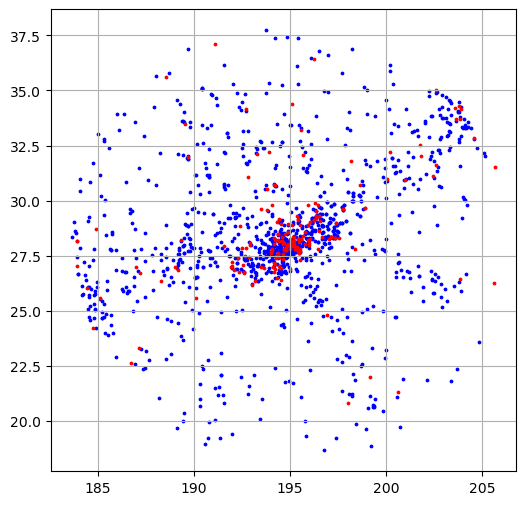

In [3]:
# Location of AGN and SF galaxies

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
type = coma_df['Type']
mask_sf = (type == 'SF') | (type == 'COMP')
mask_agn = (type == 'SY') | (type == 'LINER')
ra, dec = coma_df['ra'], coma_df['dec']
ax.scatter(ra[mask_sf], dec[mask_sf], s=3, color='blue')
ax.scatter(ra[mask_agn], dec[mask_agn], s=3, color='red')
plt.grid()
plt.show()

# Two plots side by side

/Users/dfadda/miniconda3/envs/AstronomicalData/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/dfadda/miniconda3/envs/AstronomicalData/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


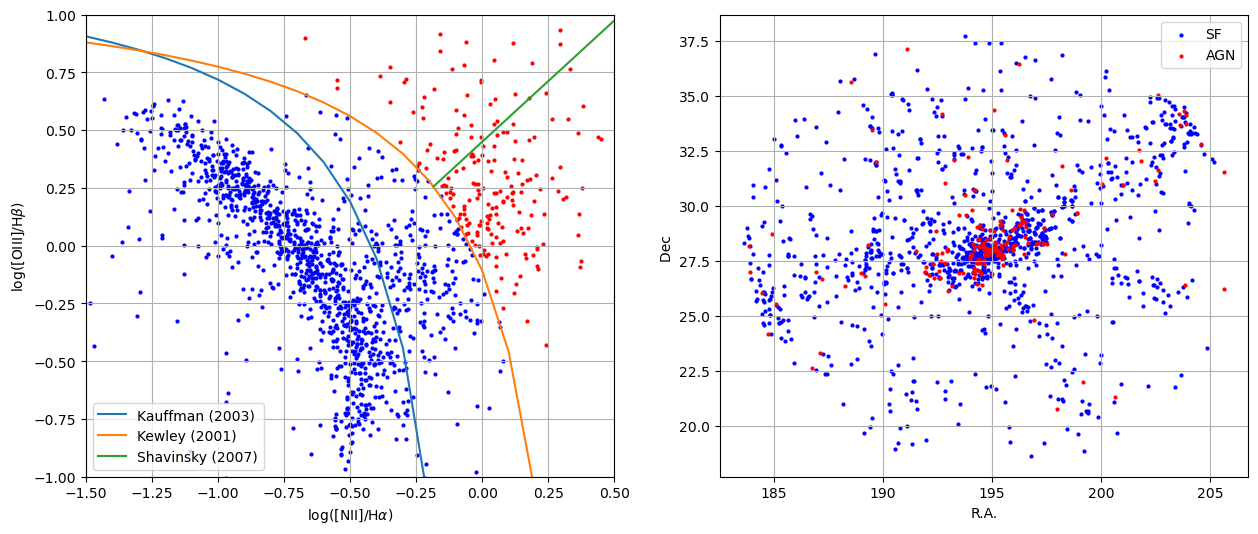

In [4]:
# Two plots side by side
import numpy as np

type = coma_df['Type']
mask_sf = (type == 'SF') | (type == 'COMP')
mask_agn = (type == 'SY') | (type == 'LINER')
ra, dec = coma_df['ra'], coma_df['dec']
nii_halpha = np.log10(coma_df['nii_6584_flux']) - np.log10(coma_df['h_alpha_flux'])
oiii_hbeta = np.log10(coma_df['oiii_5007_flux']) - np.log10(coma_df['h_beta_flux'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
    
ax1.scatter(nii_halpha[mask_sf], oiii_hbeta[mask_sf],s=4,color='blue')
ax1.scatter(nii_halpha[mask_agn], oiii_hbeta[mask_agn],s=4,color='red')
ax1.set_xlim(-1.5,0.5)
ax1.set_ylim(-1.,1.)
x=np.arange(-1.5,0.0,0.1)
ax1.plot(x, 0.61/(x-0.05)+1.3,label='Kauffman (2003)')
x=np.arange(-1.5,0.5,0.1)
ax1.plot(x, 0.61/(x-0.47)+1.19,label='Kewley (2001)')
x=np.arange(-0.18380687748,0.7,0.1)
ax1.plot(x, 1.05*x+0.45,label='Shavinsky (2007)')
ax1.set_xlabel('log([NII]/H$\\alpha$)')
ax1.set_ylabel('log([OIII]/H$\\beta$)')
ax1.legend()
ax1.grid()

ax2.scatter(ra[mask_sf], dec[mask_sf], s=4, color='blue', label='SF')
ax2.scatter(ra[mask_agn], dec[mask_agn], s=4, color='red', label='AGN')
ax2.grid()
ax2.legend()
ax2.set_xlabel('R.A.')
ax2.set_ylabel('Dec ')
plt.show()

# Styles

In [5]:
# Styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [6]:
# Return to default
plt.style.use('default')

## Exercise

Use one of the searborn styles to redo the last plot.

You will have to use:  plt.style.use() with the style as an argument.

/Users/dfadda/miniconda3/envs/AstronomicalData/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/dfadda/miniconda3/envs/AstronomicalData/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


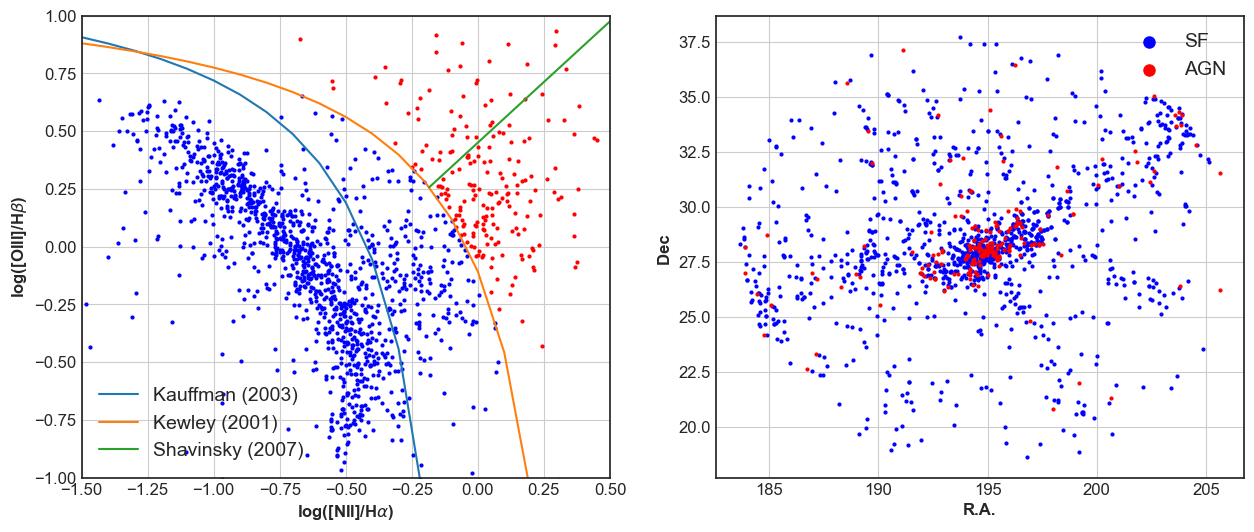

In [7]:
# Better style

# Matplotlib plot style
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 14

import numpy as np

type = coma_df['Type']
mask_sf = (type == 'SF') | (type == 'COMP')
mask_agn = (type == 'SY') | (type == 'LINER')
ra, dec = coma_df['ra'], coma_df['dec']
nii_halpha = np.log10(coma_df['nii_6584_flux']) - np.log10(coma_df['h_alpha_flux'])
oiii_hbeta = np.log10(coma_df['oiii_5007_flux']) - np.log10(coma_df['h_beta_flux'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
    
ax1.scatter(nii_halpha[mask_sf], oiii_hbeta[mask_sf],s=4,color='blue')
ax1.scatter(nii_halpha[mask_agn], oiii_hbeta[mask_agn],s=4,color='red')
ax1.set_xlim(-1.5,0.5)
ax1.set_ylim(-1.,1.)
x=np.arange(-1.5,0.0,0.1)
ax1.plot(x, 0.61/(x-0.05)+1.3,label='Kauffman (2003)')
x=np.arange(-1.5,0.5,0.1)
ax1.plot(x, 0.61/(x-0.47)+1.19,label='Kewley (2001)')
x=np.arange(-0.18380687748,0.7,0.1)
ax1.plot(x, 1.05*x+0.45,label='Shavinsky (2007)')
ax1.set_xlabel('log([NII]/H$\\alpha$)')
ax1.set_ylabel('log([OIII]/H$\\beta$)')
ax1.legend()
ax1.grid()

ax2.scatter(ra[mask_sf], dec[mask_sf], s=4, color='blue', label='SF')
ax2.scatter(ra[mask_agn], dec[mask_agn], s=4, color='red', label='AGN')
ax2.grid()
ax2.legend(markerscale=4) # Bigger dots
ax2.set_xlabel('R.A.')
ax2.set_ylabel('Dec ')
plt.tight_layout
plt.show()

# Regions

Alternative is to install the astropy-regions package:

pip install regions

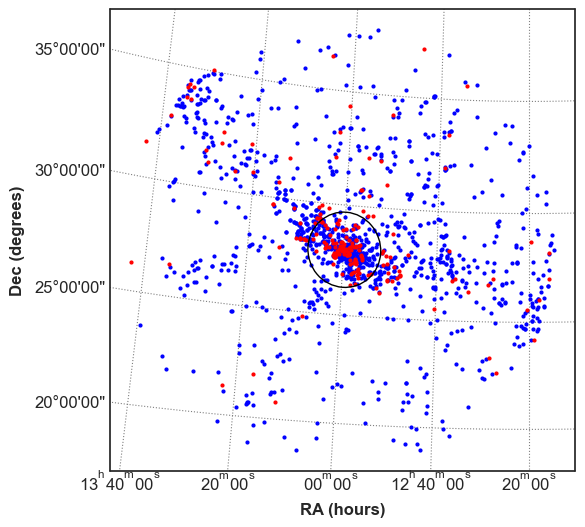

In [34]:
# Plot with astrometry & circle at 3 Mpc
from astropy.wcs import WCS
import astropy.units as u
from matplotlib.patches import Ellipse


deg2Mpc = cosmo.kpc_proper_per_arcmin(z0).to(u.Mpc/u.deg)

fig = plt.figure(figsize=[6, 6])
w = WCS(naxis=2)
w.wcs.crpix = [1000, 1000]         
w.wcs.cdelt = np.array([-4/1000, 4/1000])  # FOV radius/number of pixels
w.wcs.crval = [center.ra.deg, center.dec.deg] # reference RA, Dec
w.wcs.ctype = ["RA---TAN", "DEC--TAN"]

ax = fig.add_subplot(111, projection=w)
ax.scatter(ra[mask_sf], dec[mask_sf], s=4, color='blue', label='SF', transform=ax.get_transform('icrs'))
ax.scatter(ra[mask_agn], dec[mask_agn], s=4, color='red', label='AGN', transform=ax.get_transform('icrs'))
ax.coords.grid(True, color='grey', linestyle='dotted')

# Set the coordinate grid
ax.coords[0].set_axislabel('RA (hours)')
ax.coords[1].set_axislabel('Dec (degrees)')
ax.coords[0].set_major_formatter('hh:mm:ss')
ax.coords[1].set_major_formatter('dd:mm:ss')

radius = 2.86 / deg2Mpc.value # Virial radius of Coma
center = SkyCoord("12h59m48.7s +27d58m50s", frame='icrs')
circle = Ellipse((center.ra.deg, center.dec.deg), 
                 height = 2*radius, 
                 width=2*radius/np.cos(center.dec.deg * np.pi/180), 
                 facecolor="none",
                 edgecolor="black",
                 transform=ax.get_transform('icrs'))
ax.add_patch(circle)


plt.show()

# Functions

In [88]:
def plot_map(ax, ra, dec, center, radius, mask_agn, mask_sf):
    """
    Plot a map
    """

    # Plot with astrometry & circle at virial radius
    from matplotlib.patches import Ellipse

    ax.scatter(ra[mask_sf], dec[mask_sf], s=4, color='blue', label='SF', transform=ax.get_transform('icrs'))
    ax.scatter(ra[mask_agn], dec[mask_agn], s=4, color='red', label='AGN', transform=ax.get_transform('icrs'))
    ax.coords.grid(True, color='grey', linestyle='dotted')

    # Set the coordinate grid
    ax.coords[0].set_axislabel('RA (hours)')
    ax.coords[1].set_axislabel('Dec (degrees)')
    ax.coords[0].set_major_formatter('hh:mm:ss')
    ax.coords[1].set_major_formatter('dd:mm:ss')
    
    circle = Ellipse((center.ra.deg, center.dec.deg), 
                     height = 2*radius, 
                     width=2*radius/np.cos(center.dec.deg * np.pi/180), 
                     facecolor="none",
                     edgecolor="black", linestyle=":",
                     transform=ax.get_transform('icrs'))
    ax.add_patch(circle)
    ax.legend(markerscale=4) # Bigger dots


def plot_caustic(ax, sep, v, radius, mask_agn, mask_sf):
    """
    Plot a v vs distance caustic
    """

    ax.scatter(sep[mask_sf], v[mask_sf], s=1, color='blue', label='SF')
    ax.scatter(sep[mask_agn], v[mask_agn], s=1, color='red', label='AGN')

    ax.set_xlabel('Clustercentric distance [Mpc]')
    ax.set_ylabel('Velocity [km/s]')
    ax.grid()
    ax.legend(markerscale=4) # Bigger dots

    # Vertical line
    ax.axvline(radius, color='black',linestyle=':')


def plot_bpt(ax, nii_halpha, oiii_hbeta, mask_agn, mask_sf):
    """
    Plot a BPT diagram
    """

    ax.scatter(nii_halpha[mask_sf], oiii_hbeta[mask_sf],s=4,color='blue')
    ax.scatter(nii_halpha[mask_agn], oiii_hbeta[mask_agn],s=4,color='red')
    ax.set_xlim(-1.5,0.5)
    ax.set_ylim(-1.,1.)
    x=np.arange(-1.5,0.0,0.1)
    ax.plot(x, 0.61/(x-0.05)+1.3,label='Kauffman (2003)')
    x=np.arange(-1.5,0.5,0.1)
    ax.plot(x, 0.61/(x-0.47)+1.19,label='Kewley (2001)')
    x=np.arange(-0.18380687748,0.7,0.1)
    ax.plot(x, 1.05*x+0.45,label='Shavinsky (2007)')
    ax.set_xlabel('log([NII]/H$\\alpha$)')
    ax.set_ylabel('log([OIII]/H$\\beta$)')
    ax.legend(fontsize=10)
    ax.grid()


# Subplot Grid

/Users/dfadda/miniconda3/envs/AstronomicalData/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/dfadda/miniconda3/envs/AstronomicalData/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


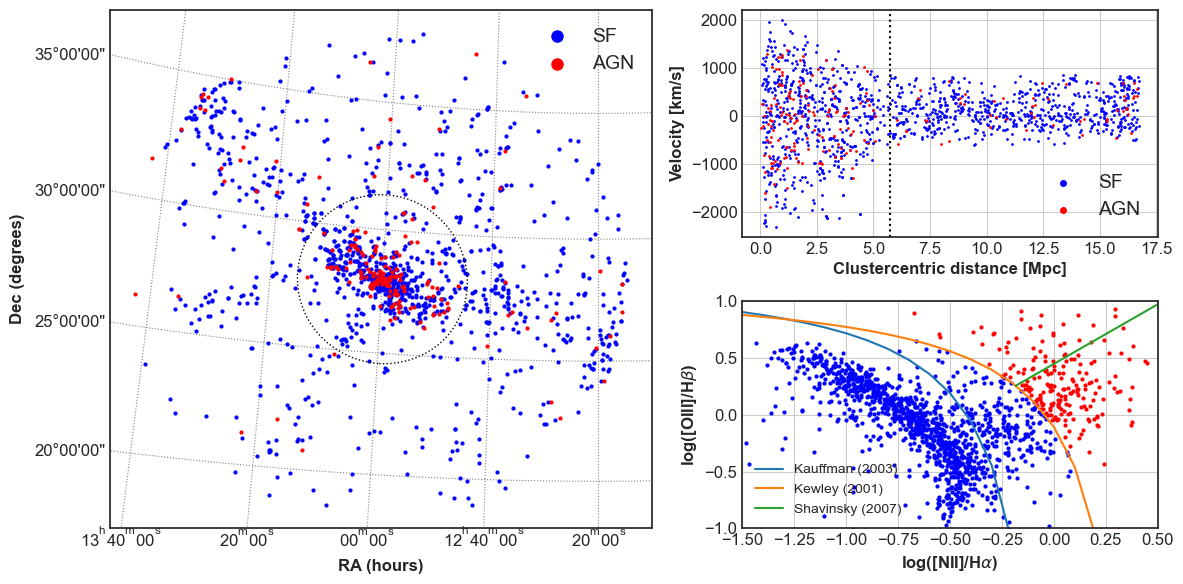

In [90]:
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
z0 = 0.0231
deg2Mpc = cosmo.kpc_proper_per_arcmin(z0).to(u.Mpc/u.deg)
center = SkyCoord("12h59m48.7s +27d58m50s", frame='icrs')

type = coma_df['Type']
mask_sf = (type == 'SF') | (type == 'COMP')
mask_agn = (type == 'SY') | (type == 'LINER')

w = WCS(naxis=2)
w.wcs.crpix = [1000, 1000]         
w.wcs.cdelt = np.array([-4/1000, 4/1000])  # FOV radius/number of pixels
w.wcs.crval = [center.ra.deg, center.dec.deg] # reference RA, Dec
w.wcs.ctype = ["RA---TAN", "DEC--TAN"]
ra, dec = coma_df['ra'], coma_df['dec']
nii_halpha = np.log10(coma_df['nii_6584_flux']) - np.log10(coma_df['h_alpha_flux'])
oiii_hbeta = np.log10(coma_df['oiii_5007_flux']) - np.log10(coma_df['h_beta_flux'])

radius = 2 * 2.86 / deg2Mpc.value # Virial radius of Coma

plt.figure(figsize=(12, 6))
shape = (2, 9)
ax1 = plt.subplot2grid(shape, (0,0), colspan=5, rowspan=2, projection=w)
plot_map(ax1, ra, dec, center, radius, mask_agn, mask_sf)

ax2 = plt.subplot2grid(shape, (0, 5), colspan=4)
plot_caustic(ax2, coma_df['dang'], coma_df['v'], 2.86*2, mask_agn, mask_sf)

ax3 = plt.subplot2grid(shape, (1, 5), colspan=4)
plot_bpt(ax3, nii_halpha, oiii_hbeta, mask_agn, mask_sf)
plt.tight_layout()
plt.show()

## Exercise

Redo the previous plot (side by side) using the functions just defined.

/Users/dfadda/miniconda3/envs/AstronomicalData/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/dfadda/miniconda3/envs/AstronomicalData/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 600x600 with 0 Axes>

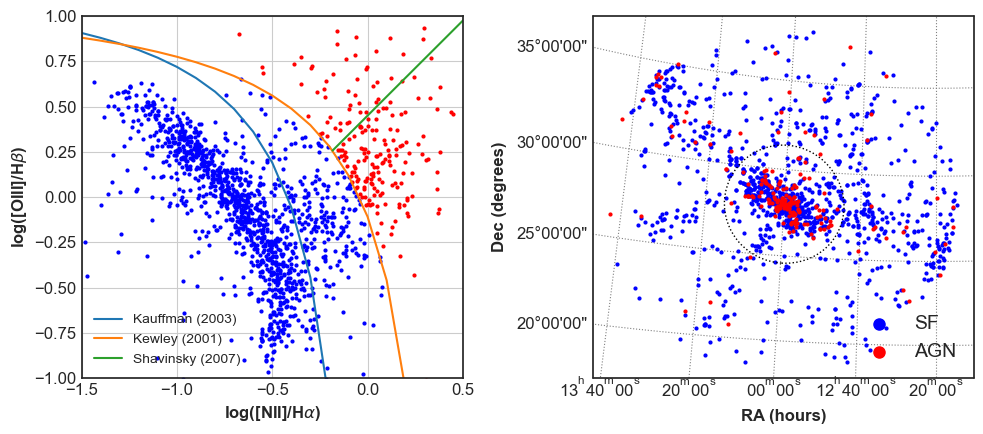

In [104]:
# Plot with astrometry & circle at 3 Mpc
from astropy.wcs import WCS
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM
from matplotlib.patches import Ellipse

cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)


z0 = 0.0231
center = SkyCoord("12h59m48.7s +27d58m50s", frame='icrs')
deg2Mpc = cosmo.kpc_proper_per_arcmin(z0).to(u.Mpc/u.deg)

w = WCS(naxis=2)
w.wcs.crpix = [1000, 1000]         
w.wcs.cdelt = np.array([-4/1000, 4/1000])  # FOV radius/number of pixels
w.wcs.crval = [center.ra.deg, center.dec.deg] # reference RA, Dec
w.wcs.ctype = ["RA---TAN", "DEC--TAN"]

type = coma_df['Type']
mask_sf = (type == 'SF') | (type == 'COMP')
mask_agn = (type == 'SY') | (type == 'LINER')
ra, dec = coma_df['ra'], coma_df['dec']
nii_halpha = np.log10(coma_df['nii_6584_flux']) - np.log10(coma_df['h_alpha_flux'])
oiii_hbeta = np.log10(coma_df['oiii_5007_flux']) - np.log10(coma_df['h_beta_flux'])
radius = 2 * 2.86 / deg2Mpc.value # 2 x Virial radius of Coma


shape = (1,2)
plt.figure(figsize=(10, 4.5))
ax = plt.subplot2grid(shape, (0,1), colspan=1, rowspan=1, projection=w)
plot_map(ax, ra, dec, center, radius, mask_agn, mask_sf)

ax = plt.subplot2grid(shape, (0,0), colspan=1, rowspan=1)
plot_bpt(ax, nii_halpha, oiii_hbeta, mask_agn, mask_sf)
plt.tight_layout()
plt.show()